In [1]:
# Import Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
# Load Iris Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Use only Petal Length & Petal Width
df = df[['petal length (cm)', 'petal width (cm)']]

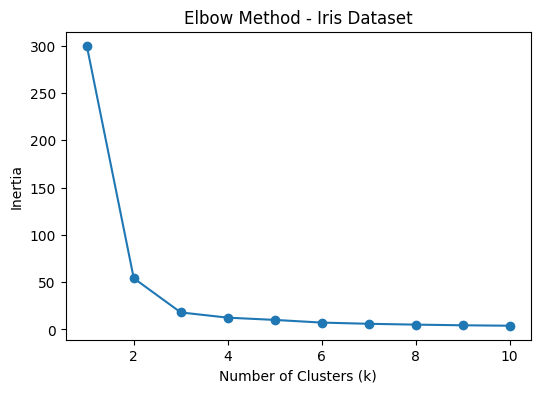

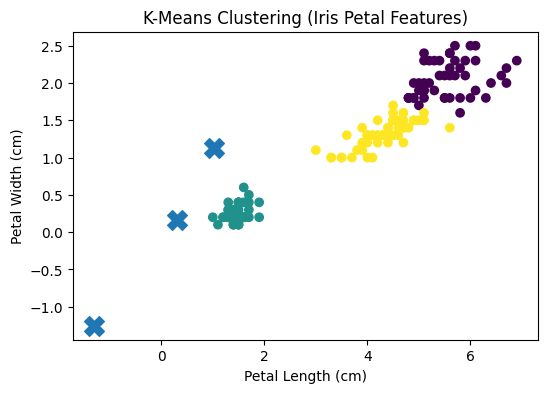

In [4]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Iris Dataset")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Optimal k = 3 (Based on elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to dataset
df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(6,4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X')
plt.title("K-Means Clustering (Iris Petal Features)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()